In [5]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
## Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
# Modelos de clasificacion
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression
## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score, log_loss
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
#import cufflinks as cf
#cf.set_config_file(offline = True)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

He intentado escoger acciones con poca correlación. La explicación de ellas es:

AAPL: Apple Inc., uno de los fabricantes más grandes de tecnología de consumo, conocido por productos como el iPhone, el iPad y las MacBooks.

RELIANCE.NS: Reliance Industries Limited, una conglomerado multinacional indio que tiene negocios en diversos sectores como energía, petroquímicos, textiles, recursos naturales, y telecomunicaciones. El sufijo ".NS" indica que la acción se negocia en la National Stock Exchange of India.

BHP.AX: BHP Group Limited (anteriormente BHP Billiton), una de las compañías mineras y de recursos más grandes del mundo. El sufijo ".AX" indica que la acción se negocia en la Australian Securities Exchange.

SAN.MC: Banco Santander, S.A., un banco multinacional español y una de las mayores instituciones bancarias de la zona euro. El sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

REP.MC: Repsol, S.A., una empresa energética y petroquímica española. Al igual que SAN.MC, el sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

IBE.MC: Iberdrola, S.A., una empresa española de energía, una de las mayores productoras de energía renovable. También cotiza en la Bolsa de Madrid.

TEF.MC: Telefónica, S.A., una compañía multinacional de telecomunicaciones con sede en España. También cotiza en la Bolsa de Madrid.

Acciones con las que trabajaré: 

["AAPL", "RELIANCE.NS", "BHP.AX", "SAN.MC", "REP.MC", "IBE.MC", "TEF.MC"]

In [6]:
df = pd.read_csv("acciones_preprocesado.csv")
# quito los que devuelve 0 la dirección ya que no me calcula bien las métricas de los modelos
#df = df[df.direction != 0]
#df.reset_index(inplace=True, drop=True)
df

,accion,date,price,price_lag1,high_lag1,low_lag1,direction,lag1,lag2,lag3,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,AAPL,2014-10-24,23.415148,23.328363,26.262501,25.907499,1.0,0.017708,0.005062,0.026803,...,26.262501,2014,297,43,-8.660254e-01,0.5,-0.988468,0.151428,-0.433884,-0.900969
1,AAPL,2014-10-27,23.390673,23.415148,26.372499,26.132500,-1.0,0.003713,0.017708,0.005062,...,26.372499,2014,300,44,-8.660254e-01,0.5,-0.724793,0.688967,0.000000,1.000000
2,AAPL,2014-10-28,23.753399,23.390673,26.370001,26.174999,1.0,-0.001046,0.003713,0.017708,...,26.372499,2014,301,44,-8.660254e-01,0.5,-0.571268,0.820763,0.781831,0.623490
3,AAPL,2014-10-29,23.886925,23.753399,26.684999,26.337500,1.0,0.015388,-0.001046,0.003713,...,26.684999,2014,302,44,-8.660254e-01,0.5,-0.394356,0.918958,0.974928,-0.222521
4,AAPL,2014-10-30,23.806814,23.886925,26.842501,26.590000,-1.0,0.005606,0.015388,-0.001046,...,26.842501,2014,303,44,-8.660254e-01,0.5,-0.201299,0.979530,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11718,TEF.MC,2023-12-21,3.492111,3.546088,3.820000,3.646000,-1.0,0.031477,-0.007545,-0.009145,...,4.075000,2023,355,51,-2.449294e-16,1.0,-0.897805,-0.440394,0.433884,-0.900969
11719,TEF.MC,2023-12-22,3.454520,3.492111,3.685000,3.615000,-1.0,-0.015339,0.031477,-0.007545,...,4.075000,2023,356,51,-2.449294e-16,1.0,-0.968077,-0.250653,-0.433884,-0.900969
11720,TEF.MC,2023-12-27,3.441990,3.454520,3.650000,3.571000,-1.0,-0.010823,-0.015339,0.031477,...,4.075000,2023,361,52,-2.449294e-16,1.0,-0.724793,0.688967,0.974928,-0.222521
11721,TEF.MC,2023-12-28,3.412110,3.441990,3.590000,3.555000,-1.0,-0.003634,-0.010823,-0.015339,...,4.075000,2023,362,52,-2.449294e-16,1.0,-0.571268,0.820763,0.433884,-0.900969


Lo primero que voy a hacer es transformar la fecha para poder meterla como variable numérica 

Ahora voy a separar los data frames en:
1.- variables categóricas para hacerle onehotencoding
2.- variables numéricas para aplicarle escaladores
3.- variables seno y cosenoidales que no se transforman ya más
4.- variable objetivo (dirección)

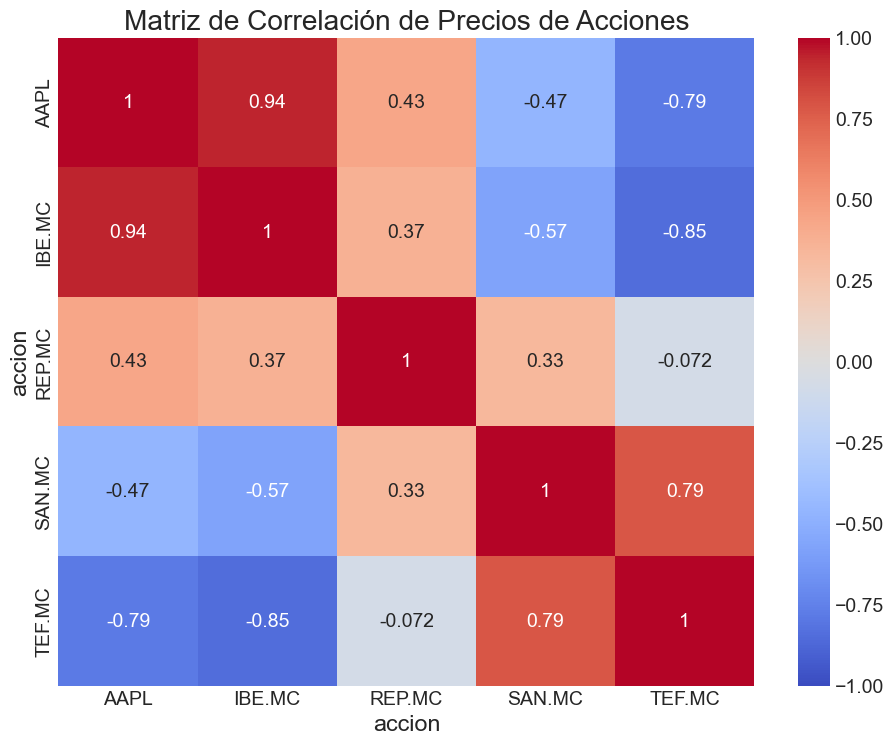

In [7]:
df_pivot = df.pivot(index='date', columns='accion', values='price')

# Calcular la correlación entre los precios de las acciones
correlation_matrix = df_pivot.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Precios de Acciones')
plt.show()


In [46]:
df_cat = df[["accion"]].copy()
columns_to_copy = [col for col in df.columns if col.startswith('sin') or col.startswith('cos')]
df_sincos = df[columns_to_copy].copy()
columns_to_exclude = columns_to_copy + ["accion", "direction", "date"] #, "price", "returns"]
columns_to_select = [col for col in df.columns if col not in columns_to_exclude]
df_num = df[columns_to_select].copy()
df_dir = df[["direction"]].copy()

Empiezo haciendo one hot encoding sobre la única variable tipo texto que tengo. El nombre de la acción

In [47]:
# drop_first para evitar la colinealidad
df_cat = pd.get_dummies(df_cat, columns=["accion"], drop_first = True).astype(int)
df_cat 


,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
41652,0,0,0,0,0,1
41653,0,0,0,0,0,1
41654,0,0,0,0,0,1
41655,0,0,0,0,0,1


Ahora aplico escaladores sobre las variables numéricas

Ahora ya tengo el df de categóricas con onehotencoding y las numéricas con los datos escalados. Por tanto los quiero volver a unir y juntar también con las variables seno y cosenoidales. Y tener solo separada la variable objetivo

In [48]:
df_num[df_num.isna().any(axis=1)]

,high,low,price,returns,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_s,ema_l,roll_low,roll_high,year,day_of_year,week_of_year


In [49]:
# por otra parte me guardo la variable objetivo en este dataframe y veo que está balanceado pero que tiene algunos 0, 
# no se bien que hacer con ellos. Significa que la diferencia de precio de un día a otro ha sido 0
df_dir.direction.value_counts()

direction
 1.0    21028
-1.0    19770
 0.0      859
Name: count, dtype: int64

Ahora vamos a entrenar un modelo solo para ver que tal funciona, si me das el ok Alejandro intento meterle un bucle para que pruebe distintos modelos y distintos escaladores. De momento hago la prueba con logistic regression.

In [50]:
# Configurar el método de validación cruzada
cv = TimeSeriesSplit(n_splits=5)

# Diccionario de métricas de scoring
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# DataFrame para guardar los resultados finales
results = pd.DataFrame()
df_dir_reduc = df_dir.copy()

# Aplicar el escalador a los datos
scaler = QuantileTransformer(output_distribution="normal")
X_scaled = pd.DataFrame(scaler.fit_transform(df_num.copy()), columns=df_num.columns)  
df_variables = pd.concat([df_cat, df_sincos, df_num], axis=1)
df_variables_reduc = df_variables.copy()

# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(df_variables_reduc, df_dir_reduc)

# Ejecutar cross_validate
cv_results = cross_validate(model, df_variables_reduc, df_dir_reduc, cv=cv, scoring=scoring)

# Guardar los resultados en el DataFrame
temp_df = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision'],
    'Recall/Sensibility': cv_results['test_recall'],
    'F1-Score': cv_results['test_f1'],
    'ROC AUC': cv_results['test_roc_auc']
})

results = pd.concat([results, temp_df], ignore_index=True)

# Calcular los promedios y asignar el índice 'Media'
means = results.mean().to_frame().T
means.index = ['Media']

# Concatenar la fila de promedios al DataFrame original
results = pd.concat([results, means], ignore_index=False)

# Mostrar el DataFrame con la fila de promedios añadida
print(results)


       Accuracy  Precision  Recall/Sensibility  F1-Score  ROC AUC
0      0.999712        NaN                 NaN       NaN      NaN
1      1.000000        NaN                 NaN       NaN      NaN
2      1.000000        NaN                 NaN       NaN      NaN
3      1.000000        NaN                 NaN       NaN      NaN
4      1.000000        NaN                 NaN       NaN      NaN
Media  0.999942        NaN                 NaN       NaN      NaN


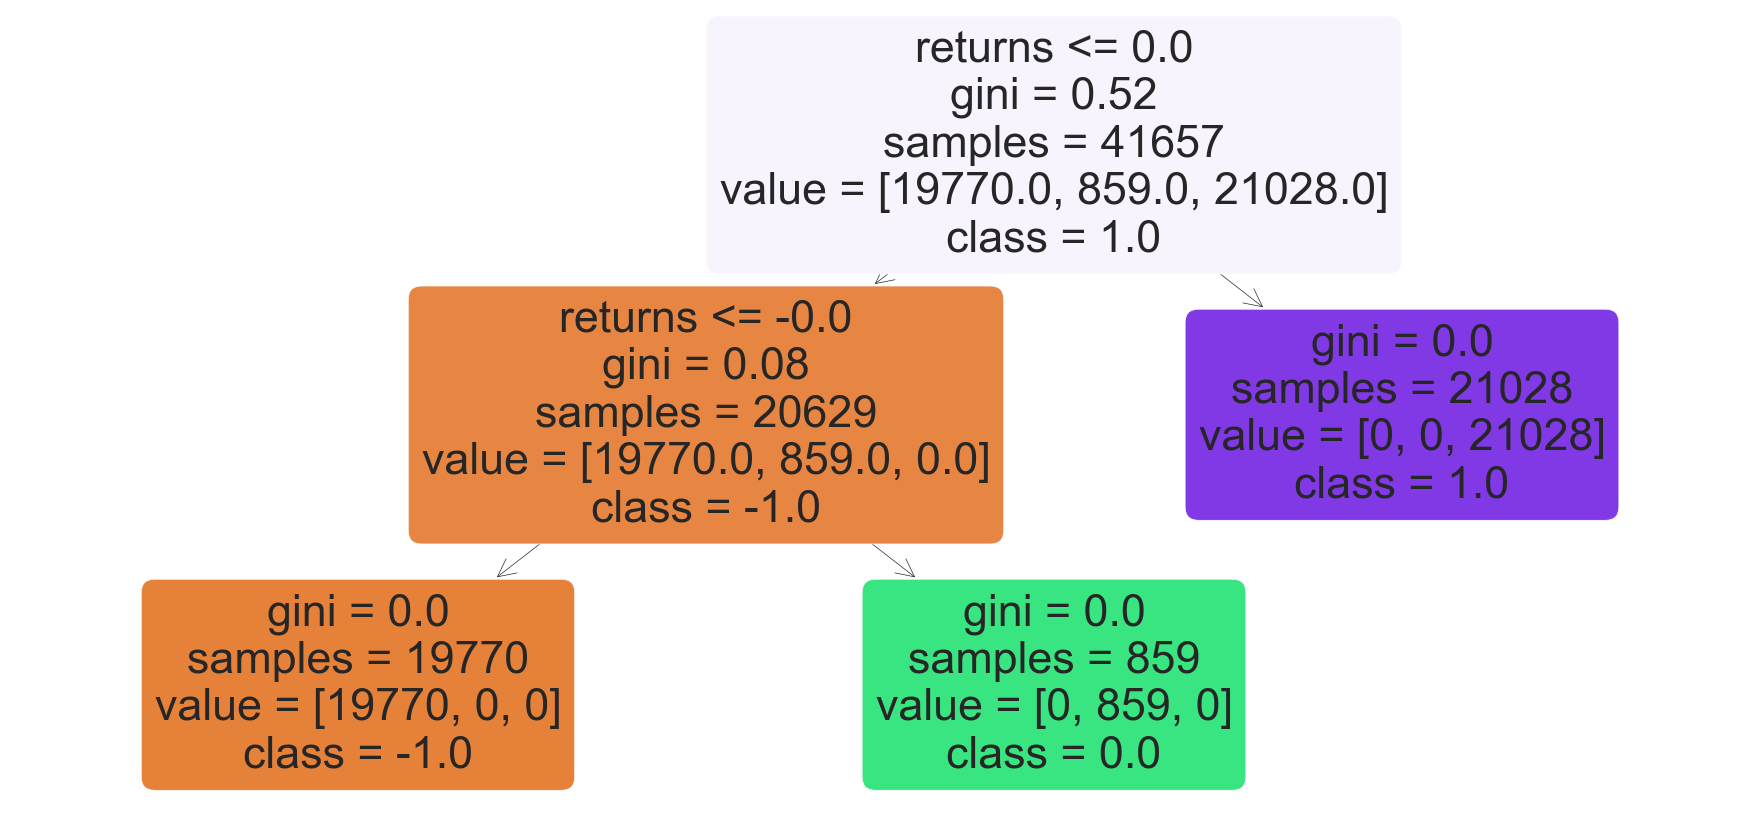

In [51]:
plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=df_variables.columns,  
          class_names=[str(cls) for cls in model.classes_],  
          filled=True, 
          rounded=True)
plt.show()

In [28]:
df

,accion,date,high,low,price,returns,direction,lag1,lag2,lag3,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,AAPL,2000-10-24,0.372768,0.335938,0.284963,-0.076468,-1.0,0.043894,0.029269,-0.060818,...,0.437500,2000,298,43,-0.866025,0.5,-9.884683e-01,0.151428,0.781831,0.623490
1,AAPL,2000-10-25,0.342634,0.329241,0.279301,-0.020069,-1.0,-0.076468,0.043894,0.029269,...,0.415179,2000,299,43,-0.866025,0.5,-9.377521e-01,0.347305,0.974928,-0.222521
2,AAPL,2000-10-27,0.342634,0.319196,0.280245,0.003373,1.0,0.000000,-0.020069,-0.076468,...,0.415179,2000,301,43,-0.866025,0.5,-7.247928e-01,0.688967,-0.433884,-0.900969
3,AAPL,2000-10-30,0.356027,0.334821,0.291568,0.039610,1.0,0.003373,0.000000,-0.020069,...,0.415179,2000,304,44,-0.866025,0.5,-2.012985e-01,0.979530,0.000000,1.000000
4,AAPL,2000-10-31,0.361607,0.343750,0.295342,0.012861,1.0,0.039610,0.003373,0.000000,...,0.415179,2000,305,44,-0.866025,0.5,-2.449294e-16,1.000000,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40793,TEF.MC,2024-02-22,3.792000,3.679000,3.743000,0.015888,1.0,0.004625,0.011244,0.018089,...,3.792000,2024,53,8,0.866025,0.5,-9.680771e-01,-0.250653,0.433884,-0.900969
40794,TEF.MC,2024-02-23,3.776000,3.710000,3.776000,0.008778,1.0,0.015888,0.004625,0.011244,...,3.792000,2024,54,8,0.866025,0.5,-9.987165e-01,-0.050649,-0.433884,-0.900969
40795,TEF.MC,2024-02-27,3.815000,3.751000,3.810000,0.008964,1.0,0.000000,0.008778,0.015888,...,3.815000,2024,58,9,0.866025,0.5,-7.247928e-01,0.688967,0.781831,0.623490
40796,TEF.MC,2024-02-28,3.874000,3.814000,3.828000,0.004713,1.0,0.008964,0.000000,0.008778,...,3.874000,2024,59,9,0.866025,0.5,-5.712682e-01,0.820763,0.974928,-0.222521


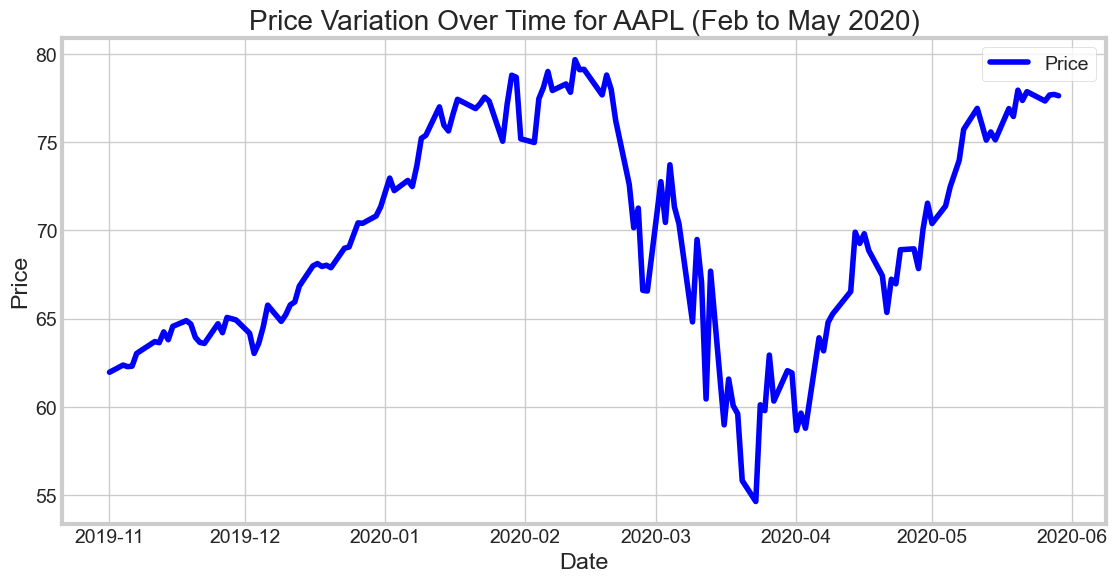

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrar solo las filas donde la columna 'accion' es 'AAPL'
df_aapl = df[df['accion'] == 'AAPL']

# Filtrar el rango de fechas de febrero a mayo de 2020
start_date = '2019-11-01'
end_date = '2020-05-31'
mask = (df_aapl['date'] >= start_date) & (df_aapl['date'] <= end_date)
df_filtered = df_aapl[mask]

# Crear la gráfica de precio respecto al tiempo para 'AAPL' en el rango especificado
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['date'], df_filtered['price'], label='Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Variation Over Time for AAPL (Feb to May 2020)')
plt.legend()
plt.grid(True)
plt.show()
